# Dubinska analiza podataka - projektni zadatak

## 1. Predprocesiranje podataka

In [4]:
library(tidyr)
library(dplyr)
library(neuralnet)
library(caret)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'neuralnet'


The following object is masked from 'package:dplyr':

    compute


Loading required package: ggplot2

Loading required package: lattice



In [13]:
phoneData <- read.csv('GSMArena.csv')

#str(phoneData)

In [14]:
phoneData <- phoneData[ -c(4,15) ]
#str(phoneData)

In [15]:
phoneData <- phoneData %>%
    mutate(across(c(2:3,5:8,10:13), scale)) %>%
    mutate(across(c(GPS_new, battery_removable), ~as.numeric(ifelse(.x == 'True', 1, 0)))) %>%
    mutate(PriceCategory = ifelse(approx_price_EUR <= 200, '200',
                           ifelse(approx_price_EUR <= 500, '500', '>500')))

In [16]:
table(phoneData$PriceCategory)


>500  200  500 
 121 2859 1135 

In [5]:
names(phoneData)

[1] "approx_price_EUR"          "OS"                       
 [3] "weight_g"                  "GPS_new"                  
 [5] "primary_cam_MP"            "secondary_cam_MP"         
 [7] "GPU_new"                   "battery_mah"              
 [9] "battery_removable"         "display_resolution_inches"
[11] "screen_to_body_ratio_."    "length_mm"                
[13] "width_mm"                  "price_Range"              
[15] "PriceCategory"

In [17]:
phoneData_clean <- phoneData[, -c(1,14)]

## 2. Klasifikacija - umjetne neuronske mreže

#### Na ovom datasetu radi dobro, točnost 95%

In [18]:
indeksi = createDataPartition(phoneData_clean$PriceCategory, p = 0.7, list = FALSE)
skup_tren <- phoneData_clean[indeksi, ]
skup_test <- phoneData_clean[-indeksi, ] 

nn = neuralnet(PriceCategory ~ .,
                data = skup_tren,
                hidden = 6,
                lifesign = 'full',
                linear.output = FALSE,
                stepmax = 100000)

hidden: 6    thresh: 0.01    rep: 1/1    steps: 
   1000	min thresh: 0.230423979162757
                                                
   2000	min thresh: 0.11744416210865
                                                
   3000	min thresh: 0.0746629290696639
                                                
   4000	min thresh: 0.0489593319255583
                                                
   5000	min thresh: 0.0329522019359734
                                                
   6000	min thresh: 0.0219641740119735
                                                
   7000	min thresh: 0.021016411245173
                                                
   8000	min thresh: 0.0183690744621649
                                                
   9000	min thresh: 0.0173255076723771
                                                
  10000	min thresh: 0.01606009105724
                                                
  11000	min thresh: 0.01606009105724
                                        

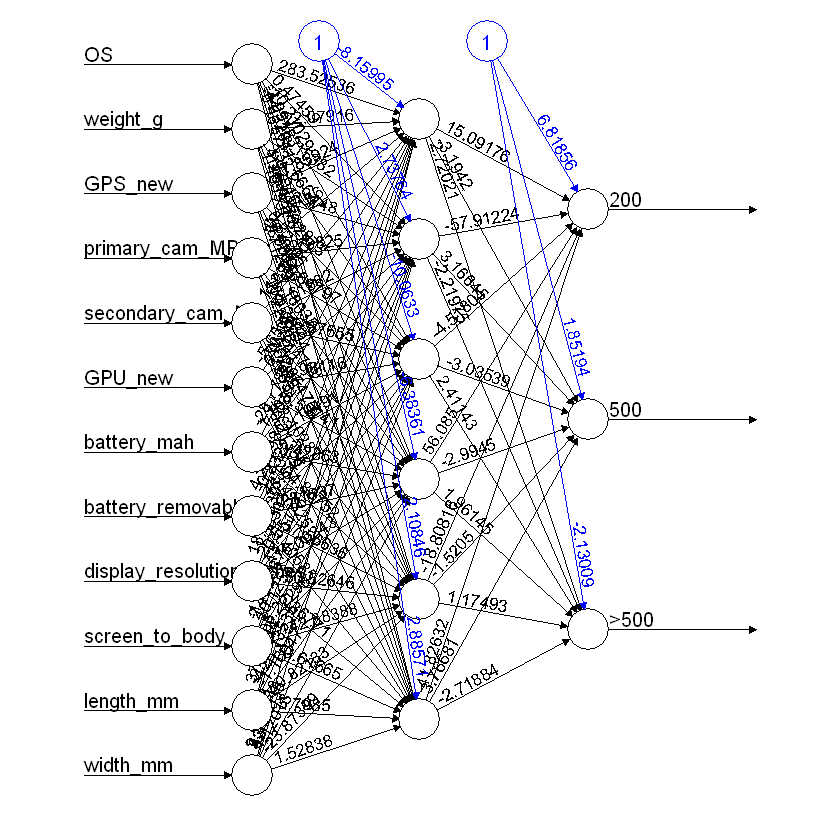

In [19]:
plot(nn, rep=1)

In [21]:
predikcije <- neuralnet::compute(nn, rep = 1, skup_test[, -21])

pred <- predikcije$net.result

pred <- data.frame("pred"=ifelse(max.col(pred[ ,1:3])==1, ">500",
                          ifelse(max.col(pred[ ,1:3])==2, "200", "500")))

cm <- confusionMatrix(as.factor(skup_test$PriceCategory), as.factor(pred$pred))
 
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction >500 200 500
      >500    2   9  25
      200     5 763  89
      500     2 126 212

Overall Statistics
                                          
               Accuracy : 0.7924          
                 95% CI : (0.7686, 0.8147)
    No Information Rate : 0.7283          
    P-Value [Acc > NIR] : 1.224e-07       
                                          
                  Kappa : 0.5064          
                                          
 Mcnemar's Test P-Value : 5.602e-06       

Statistics by Class:

                     Class: >500 Class: 200 Class: 500
Sensitivity             0.222222     0.8497     0.6503
Specificity             0.972222     0.7194     0.8589
Pos Pred Value          0.055556     0.8903     0.6235
Neg Pred Value          0.994152     0.6410     0.8723
Prevalence              0.007299     0.7283     0.2644
Detection Rate          0.001622     0.6188     0.1719
Detection Prevalence    0.029197    

## 3. Ansambli - slučajne šume

## 4. Asocijacijska analiza - učenje asocijacijskih pravila

## 5. Grupiranje k-sredina